In [1]:
#image-classification-Fashion-MNIST

In [60]:
import tensorflow as tf

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
print(tf.__version__)

2.3.0


In [63]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [64]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [66]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','sandal','shirt','sneaker','bag','ankle boot']

In [67]:
train_images.shape

(60000, 28, 28)

In [68]:
len(train_labels)

60000

In [69]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [70]:
test_images.shape

(10000, 28, 28)

In [71]:
len(test_labels)

10000

In [72]:
# Preprocess the data

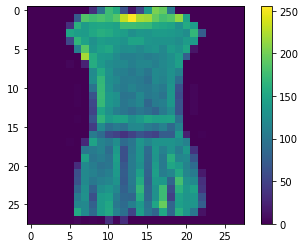

In [83]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [84]:
train_images = train_images/255.0
test_images=test_images/255.0

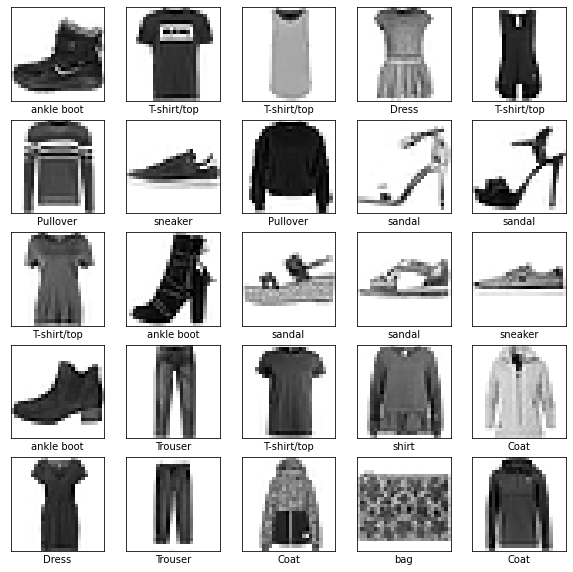

In [85]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [86]:
# build the model

In [87]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dense(10)
                            ])

In [89]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [90]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4970 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3752 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3346 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3113 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2906 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2784 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2651 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2549 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2464 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.236

In [91]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\n Test accuracy:',test_acc)

313/313 - 0s - loss: 0.3388 - accuracy: 0.8882

 Test accuracy: 0.8881999850273132


In [92]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [93]:
predictions=probability_model.predict(test_images)

In [94]:
predictions[0]

array([1.4783422e-05, 2.0552120e-08, 3.6768537e-08, 4.0110784e-10,
       2.1769239e-07, 4.1778214e-02, 4.1567156e-07, 5.2600112e-03,
       5.0445637e-06, 9.5294118e-01], dtype=float32)

In [95]:
np.argmax(predictions[0])

9

In [96]:
test_labels[0]

9

In [99]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

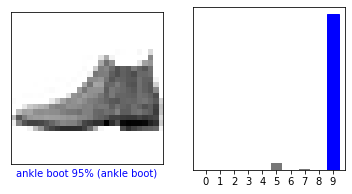

In [100]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

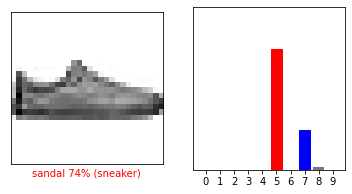

In [101]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

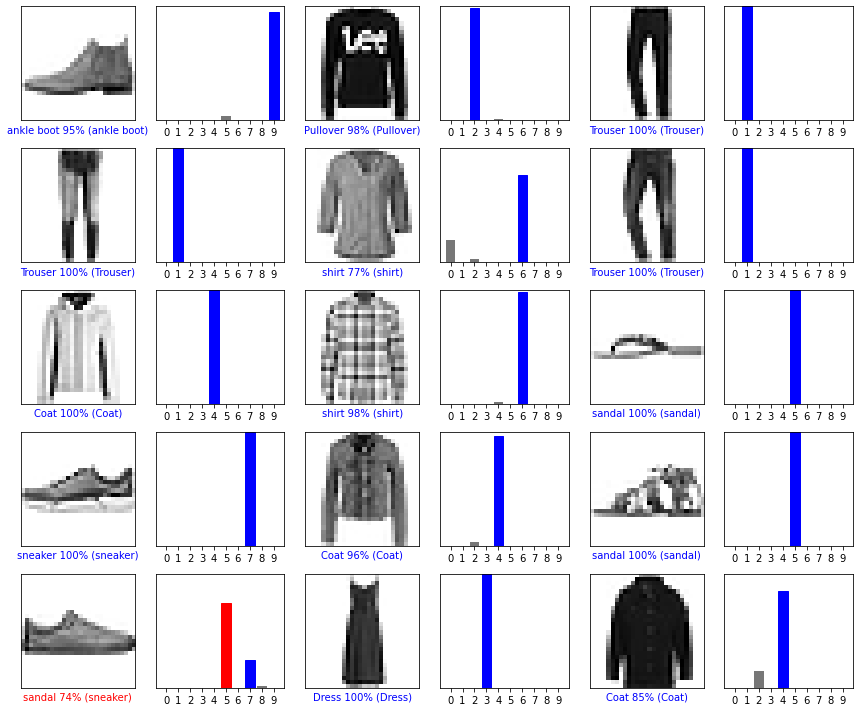

In [102]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [103]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [104]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [106]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.4915557e-03 1.7341189e-14 9.8245919e-01 3.1175139e-14 1.5212294e-02
  5.4613322e-15 8.3708437e-04 7.0095641e-18 3.6757195e-10 1.4611024e-17]]


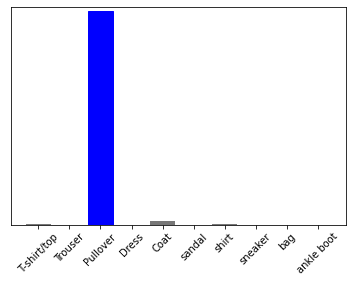

In [107]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)